Input: torch.Size([1, 112, 112])


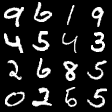

True one-hot channel masks: torch.Size([11, 112, 112])


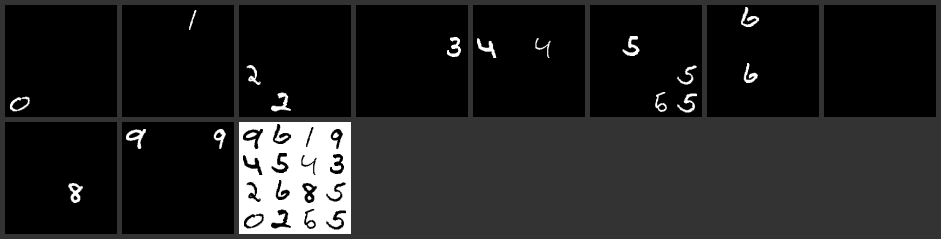

True segmented: torch.Size([11, 112, 112])


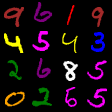

Untrained model, random weights
predicted one-hot channel masks: torch.Size([1, 11, 112, 112])


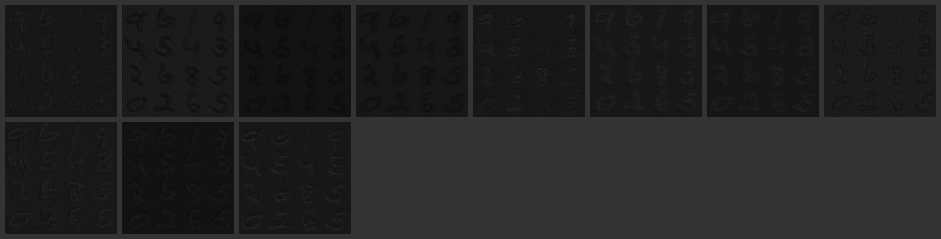

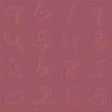

Using model checkpoint from /home/mat/ml-pytorch-examples/segmentation_unet/.model.py
(Trained model) predicted one-hot channel masks: torch.Size([1, 11, 112, 112])


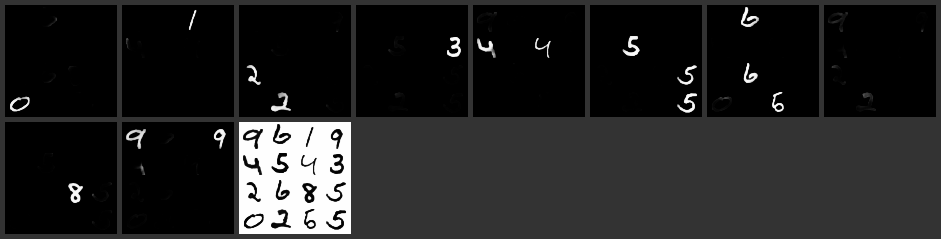

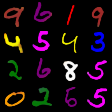

In [9]:
import torch as t
from segmentation_unet.mnist_grid_dataset import MnistGridDataset
from segmentation_unet.model import MnistSegmentationUnet
from segmentation_unet.log_activations import to_rgb
from segmentation_unet.train import checkpoint_path, test_dataset
import torchvision as tv
import os

t.manual_seed(10)

device = t.device("cuda" if t.cuda.is_available() else "cpu")

dataset = MnistGridDataset()

model = MnistSegmentationUnet(in_channels=1, num_classes=11).to(device)

input, true_seg = test_dataset[0]

print("Input:", input.shape)
grid = tv.utils.make_grid(input)
img = tv.transforms.ToPILImage()(grid)
img.show()

print("True one-hot channel masks:", true_seg.shape)
grid = tv.utils.make_grid(
    true_seg.view(1, *true_seg.shape).transpose(0, 1), pad_value=0.2, padding=5
)
img = tv.transforms.ToPILImage()(grid)
img.show()

print("True segmented:", true_seg.shape)
rgb_true = t.einsum("bcwh,cr->brwh", true_seg.view(1, *true_seg.shape), to_rgb)
img = tv.transforms.ToPILImage()(rgb_true[0])
img.show()

pred = model(input.to(device).unsqueeze(0))
print("Untrained model, random weights")
print("predicted one-hot channel masks:", pred.shape)
grid = tv.utils.make_grid(pred.transpose(0, 1), pad_value=0.2, padding=5)
img = tv.transforms.ToPILImage()(grid)
img.show()

rgb_pred = t.einsum("bcwh,cr->brwh", pred, to_rgb.to(device))
img = tv.transforms.ToPILImage()(rgb_pred[0])
img.show()

if os.path.exists(checkpoint_path):
    print(f"Using model checkpoint from {checkpoint_path}")
    model.load_state_dict(t.load(checkpoint_path))

    pred = model(input.to(device).unsqueeze(0))
    print("(Trained model) predicted one-hot channel masks:", pred.shape)
    grid = tv.utils.make_grid(pred.transpose(0, 1), pad_value=0.2, padding=5)
    img = tv.transforms.ToPILImage()(grid)
    img.show()

    rgb_pred = t.einsum("bcwh,cr->brwh", pred, to_rgb.to(device))
    img = tv.transforms.ToPILImage()(rgb_pred[0])
    img.show()
else:
    print(f"No model checkpoint found at {checkpoint_path}")